## Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [1]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data.npy').item()

data

{'Board': array([[[  0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00],
         [  1.00000000e+01,  -1.10000000e+00],
         [  2.60000000e+01,  -1.07692308e+00],
         [  6.70000000e+01,  -1.00000000e+00],
         [  1.13000000e+02,  -1.01769912e+00],
         [  1.80000000e+02,  -7.38888889e-01],
         [  2.71000000e+02,  -8.30258303e-01],
         [  3.89000000e+02,  -7.58354756e-01],
         [  4.89000000e+02,  -8.42535787e-01],
         [  5.28000000e+02,  -7.70833333e-01],
         [  4.73000000e+02,  -6.40591966e-01],
         [  8.36000000e+02,  -5.84928230e-01],
         [  8.95000000e+02,  -4.23463687e-01],
         [  1.20500000e+03,  -4.29045643e-01],
         [  1.19600000e+03,  -3.20234114e-01],
         [  1.36300000e+03,  -3.46294938e-01],
         [  1.65100000e+03,  -3.71290127e-01],
         [  1.98100000e+03,  -3.53861686e-01],
         [  1.23300000e+03,  -2.06812652e-01]],
 
        [[  0.00000000e+00,   0.00000000e+00],
 

A colored graph representation of our average board state

Proper Tetris Plot


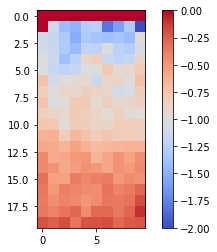

Representation in the Agent


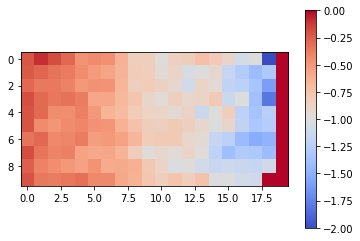

In [2]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

print("Proper Tetris Plot")
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

print("Representation in the Agent")
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.show()

In [38]:
brd

array([[[  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+01,  -2.00000000e+00],
        [  5.40000000e+01,  -1.35185185e+00],
        [  1.30000000e+02,  -1.43846154e+00],
        [  1.78000000e+02,  -1.47191011e+00],
        [  2.17000000e+02,  -1.47004608e+00],
        [  2.79000000e+02,  -1.49103943e+00],
        [  2.16000000e+02,  -1.46296296e+00],
        [  3.40000000e+02,  -1.43529412e+00],
        [  3.46000000e+02,  -1.45664740e+00],
        [  3.76000000e+02,  -1.44946809e+00],
        [  3.40000000e+02,  -1.43823529e+00],
        [  4.53000000e+02,  -1.45916115e+00],
        [  5.07000000e+02,  -1.37080868e+00],
        [  5.28000000e+02,  -1.47916667e+00],
        [  5.04000000e+02,  -1.40476190e+00],
        [  6.71000000e+02,  -1.41281669e+00],
        [  5.01000000e+02,  -1.23552894e+00],
        [  9.76000000e+02,  -1.26434426e+00]],

       [[  0.00000000e+00,   0.00000000e+00],
        [  3.50000000e+01,  -1.3